<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#constants---weights" data-toc-modified-id="constants---weights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>constants - weights</a></span></li><li><span><a href="#filter-only-injured-(injury_severity-!=-0)" data-toc-modified-id="filter-only-injured-(injury_severity-!=-0)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>filter only injured (injury_severity != 0)</a></span><ul class="toc-item"><li><span><a href="#validate-severities" data-toc-modified-id="validate-severities-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>validate severities</a></span></li></ul></li><li><span><a href="#filter-ages-5-19-only" data-toc-modified-id="filter-ages-5-19-only-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>filter ages 5-19 only</a></span><ul class="toc-item"><li><span><a href="#validate-ages" data-toc-modified-id="validate-ages-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>validate ages</a></span></li></ul></li><li><span><a href="#unique-id-per-involved" data-toc-modified-id="unique-id-per-involved-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>unique id per involved</a></span></li><li><span><a href="#filter-pedastrians,-cyclists-or-electrical-vehicles" data-toc-modified-id="filter-pedastrians,-cyclists-or-electrical-vehicles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>filter pedastrians, cyclists or electrical vehicles</a></span></li><li><span><a href="#check-vehicle_or_pedastrian" data-toc-modified-id="check-vehicle_or_pedastrian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>check vehicle_or_pedastrian</a></span></li><li><span><a href="#see-schools-types-(no-kindergardens)" data-toc-modified-id="see-schools-types-(no-kindergardens)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>see schools types (no kindergardens)</a></span></li><li><span><a href="#count-schools" data-toc-modified-id="count-schools-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>count schools</a></span></li><li><span><a href="#check-main-roads" data-toc-modified-id="check-main-roads-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>check main roads</a></span></li><li><span><a href="#cluster-crowded-cities" data-toc-modified-id="cluster-crowded-cities-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>cluster crowded cities</a></span><ul class="toc-item"><li><span><a href="#Create-squares" data-toc-modified-id="Create-squares-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Create squares</a></span></li><li><span><a href="#Get-injured-in-1.2-km-box-in-past-1-year" data-toc-modified-id="Get-injured-in-1.2-km-box-in-past-1-year-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Get injured in 1.2 km box in past 1 year</a></span></li><li><span><a href="#Get-injured-in-1.2-km-box-and-past-2-years" data-toc-modified-id="Get-injured-in-1.2-km-box-and-past-2-years-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Get injured in 1.2 km box and past 2 years</a></span></li><li><span><a href="#get-injured-in-1.4-km-box-in-5-past-years" data-toc-modified-id="get-injured-in-1.4-km-box-in-5-past-years-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>get injured in 1.4 km box in 5 past years</a></span></li></ul></li><li><span><a href="#Get-values-of-past-5-years---June-2015---May-2020-and-calculate-formula-using-נוהל-פר״ת" data-toc-modified-id="Get-values-of-past-5-years---June-2015---May-2020-and-calculate-formula-using-נוהל-פר״ת-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Get values of past 5 years - June 2015 - May 2020 and calculate formula using נוהל פר״ת</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Past-year-data" data-toc-modified-id="Past-year-data-11.0.1"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span>Past year data</a></span></li></ul></li><li><span><a href="#schools-data" data-toc-modified-id="schools-data-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>schools data</a></span></li></ul></li><li><span><a href="#Get-values-of-past-year---June-2018---May-2020-and-calculate-formula-using-נוהל-פר״ת" data-toc-modified-id="Get-values-of-past-year---June-2018---May-2020-and-calculate-formula-using-נוהל-פר״ת-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Get values of past year - June 2018 - May 2020 and calculate formula using נוהל פר״ת</a></span></li><li><span><a href="#Compare-cities" data-toc-modified-id="Compare-cities-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Compare cities</a></span></li><li><span><a href="#load-yishuv-data" data-toc-modified-id="load-yishuv-data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>load yishuv data</a></span></li></ul></div>

In [1]:
import pandas as pd
from collections import defaultdict
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import os
import math

### constants - weights

In [2]:
killed_weight = 6600/7581
severe_weight = 956/7581
light_weight = 25/7581

In [3]:
schools = defaultdict(int)
for i, filename in enumerate(os.listdir('schools_data')):
    schools[i] += 1

In [4]:
li = []

for i, filename in enumerate(os.listdir('schools_data')):
    if i % 100 == 0:
        print(i)
    df = pd.read_csv(os.path.join('schools_data', filename), index_col=None, header=0)
    li.append(df)

total_df = pd.concat(li, axis=0, ignore_index=True)
total_df['accident_timestamp'] = pd.to_datetime(total_df.accident_timestamp.values)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800


### filter only injured (injury_severity != 0)

In [5]:
total_df = total_df.loc[total_df.injury_severity != 0]

#### validate severities

In [6]:
print(total_df.injury_severity_hebrew.unique())

['פצוע קל' 'פצוע קשה' 'הרוג']


In [7]:
print(total_df.injury_severity.unique())

[3 2 1]


### filter ages 5-19 only

In [8]:
total_df = total_df.loc[total_df.age_group >= 2]

#### validate ages

In [9]:
print(total_df.age_group_hebrew.unique())

['15-19' '05-09' '10-14']


In [10]:
print(total_df.age_group.unique())

[4 2 3]


### unique id per involved

In [11]:
type(total_df['provider_and_id'].iloc[0])

int

In [12]:
total_df['inv_unique_id'] = total_df['provider_and_id'].astype(str) + '_' +  total_df['involve_id'].astype(str)


### filter pedastrians, cyclists or electrical vehicles

In [13]:
total_df = total_df.loc[(total_df.injured_type == 1) | (total_df.involve_vehicle_type == 21) | (total_df.involve_vehicle_type == 23) | (total_df.involve_vehicle_type == 15)]
                                                                                                 

In [14]:
total_df['vehicle_or_pedastrian'] = total_df.apply(lambda x: x['involve_vehicle_type_hebrew'] if x['injured_type_hebrew'] != 'הולך רגל' else  x['injured_type_hebrew'],
                                                  axis=1)


### check vehicle_or_pedastrian

In [15]:
total_df['vehicle_or_pedastrian'].unique()

array(['אופניים', 'הולך רגל', 'אופניים חשמליים', 'קורקינט חשמלי'],
      dtype=object)

In [16]:
total_df.shape

(58133, 168)

### see schools types (no kindergardens)

In [17]:
total_df.institution_type.unique()

array(['בית ספר', 'תלמוד תורה', 'ישיבה קטנה', 'בי"ס תורני',
       'ישיבה תיכונית', 'בי"ס חקלאי', 'בי"ס רפואי', 'בי"ס כנסייתי',
       'אולפנה', 'בי"ס אקסטרני', 'בי"ס קיבוצי',
       'תלמוד תורה ליד מעיין חינוך התורני', 'בי"ס מושבי'], dtype=object)

### count schools

In [18]:
total_df.school_id.nunique()

3409

### check main roads

In [19]:
main_roads = total_df.groupby('road1').inv_unique_id.nunique().rename('count_in_roads').to_frame()
main_roads.sort_values('count_in_roads', ascending=False).iloc[0:30]

,count_in_roads
road1,
4.0,27
40.0,11
805.0,10
1.0,9
65.0,9
20.0,8
85.0,4
75.0,4
44.0,4


In [20]:
main_roads.shape

(43, 1)

In [21]:
list(total_df.columns)

['Unnamed: 0',
 'accident_id',
 'provider_and_id',
 'provider_code',
 'file_type_police',
 'involved_type',
 'involved_type_hebrew',
 'license_acquiring_date',
 'age_group',
 'age_group_hebrew',
 'sex',
 'sex_hebrew',
 'involve_vehicle_type',
 'involve_vehicle_type_hebrew',
 'safety_measures',
 'safety_measures_hebrew',
 'involve_yishuv_symbol',
 'involve_yishuv_name',
 'injury_severity',
 'injury_severity_hebrew',
 'injured_type',
 'injured_type_hebrew',
 'injured_position',
 'injured_position_hebrew',
 'population_type',
 'population_type_hebrew',
 'involve_home_region',
 'involve_home_region_hebrew',
 'involve_home_district',
 'involve_home_district_hebrew',
 'involve_home_natural_area',
 'involve_home_natural_area_hebrew',
 'involve_home_municipal_status',
 'involve_home_municipal_status_hebrew',
 'involve_home_yishuv_shape',
 'involve_home_yishuv_shape_hebrew',
 'hospital_time',
 'hospital_time_hebrew',
 'medical_type',
 'medical_type_hebrew',
 'release_dest',
 'release_dest_hebre

### cluster crowded cities

In [22]:
yishuv_df = total_df.loc[total_df.school_yishuv_name == 'בני ברק'].drop_duplicates(subset=['school_id'])
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(yishuv_df.loc[:,['school_longitude', 'school_latitude']])
yishuv_df['cluster_label'] = kmeans.fit_predict(yishuv_df.loc[:,['school_longitude', 'school_latitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(yishuv_df.loc[:,['school_longitude', 'school_latitude']]) # Labels of each point


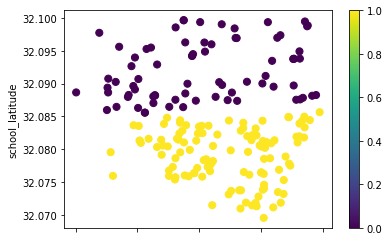

In [23]:
yishuv_df.plot.scatter(x = 'school_longitude', y = 'school_latitude', c=labels, s=50, cmap='viridis')

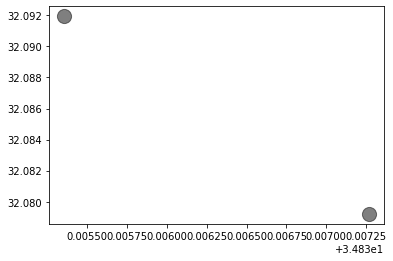

In [24]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [25]:
centers

array([[34.83535511, 32.09193937],
       [34.83726611, 32.07921373]])

#### Create squares

In [26]:
def get_bounding_box(latitude, longitude, distance_in_km):
    latitude = math.radians(latitude)
    longitude = math.radians(longitude)

    radius = 6371
    # Radius of the parallel at given latitude
    parallel_radius = radius * math.cos(latitude)

    lat_min = latitude - distance_in_km / radius
    lat_max = latitude + distance_in_km / radius
    lon_min = longitude - distance_in_km / parallel_radius
    lon_max = longitude + distance_in_km / parallel_radius
    rad2deg = math.degrees

    return rad2deg(lat_min), rad2deg(lon_min), rad2deg(lat_max), rad2deg(lon_max)

In [29]:
# bb_center_longitude = 34.837221
# bb_center_latitude = 32.087962

#### Get injured in 1.2 km box in past 1 year

In [38]:
# lat_min, lon_min, lat_max, lon_max = get_bounding_box(bb_center_latitude, bb_center_longitude, 0.6)
# baseX = lon_min
# baseY = lat_min
# distanceX = lon_max
# distanceY = lat_max

In [39]:
# injured_coor = total_df.loc[((total_df.accident_timestamp >= pd.Timestamp('2019-06-01')) & (total_df.accident_timestamp <= pd.Timestamp('2020-05-31')))]


In [40]:
# injured_coor = injured_coor.loc[:,['inv_unique_id', 'longitude', 'latitude', 'injury_severity', 'provider_and_id']].to_dict(orient='records')

# coords = []
# poly = Polygon([(baseX, baseY), 
#                 (baseX, distanceY),
#                 (distanceX, distanceY),
#                 (distanceX, baseY)])
# injured_in_2km_box = [(r['inv_unique_id'], r['injury_severity'], r['provider_and_id']) for r in injured_coor if poly.contains(Point(r['longitude'], r['latitude']))]


In [41]:
# len(set(injured_in_2km_box))

In [42]:
# tmp_df = pd.DataFrame(injured_in_2km_box)
# tmp_df.columns = ['inv_unique_id', 'injury_severity', 'provider_and_id']

In [43]:
# killed = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 1].inv_unique_id.nunique()
# severe_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 2].inv_unique_id.nunique()
# light_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 3].inv_unique_id.nunique()
# total_accidents = tmp_df.provider_and_id.nunique()
# score = (killed * killed_weight + severe_injured * severe_weight  + light_injured * light_weight) * (total_accidents)


In [44]:
# killed_1_years_bb_center = killed
# severe_injured_1_years_bb_center = severe_injured
# light_injured_1_years_bb_center = light_injured
# score_1_years_bb_center = score

#### Get injured in 1.2 km box and past 2 years

In [45]:
# lat_min, lon_min, lat_max, lon_max = get_bounding_box(bb_center_latitude, bb_center_longitude, 0.6)
# baseX = lon_min
# baseY = lat_min
# distanceX = lon_max
# distanceY = lat_max

In [46]:
# injured_coor = total_df.loc[((total_df.accident_timestamp >= pd.Timestamp('2018-06-01')) & (total_df.accident_timestamp <= pd.Timestamp('2020-05-31')))]


In [47]:
# injured_coor = injured_coor.loc[:,['inv_unique_id', 'longitude', 'latitude', 'injury_severity', 'provider_and_id']].to_dict(orient='records')

# coords = []
# poly = Polygon([(baseX, baseY), 
#                 (baseX, distanceY),
#                 (distanceX, distanceY),
#                 (distanceX, baseY)])
# injured_in_2km_box = [(r['inv_unique_id'], r['injury_severity'], r['provider_and_id']) for r in injured_coor if poly.contains(Point(r['longitude'], r['latitude']))]


In [48]:
# len(set(injured_in_2km_box))

In [49]:
# tmp_df = pd.DataFrame(injured_in_2km_box)
# tmp_df.columns = ['inv_unique_id', 'injury_severity', 'provider_and_id']

In [50]:
# killed = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 1].inv_unique_id.nunique()
# severe_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 2].inv_unique_id.nunique()
# light_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 3].inv_unique_id.nunique()
# total_accidents = tmp_df.provider_and_id.nunique()
# score = (killed * killed_weight + severe_injured * severe_weight  + light_injured * light_weight) * (total_accidents)


In [51]:
# killed_2_years_bb_center = killed
# severe_injured_2_years_bb_center = severe_injured
# light_injured_2_years_bb_center = light_injured
# score_2_years_bb_center = score

#### get injured in 1.4 km box in 5 past years

In [52]:
# bne_brak_centers = [(32.0796081158354, 34.8389644813985), 
#                     (32.07985, 34.82885), 
#                     (32.087962, 34.837221), 
#                     (32.08851, 34.83872), 
#                     (32.088652004717396, 34.8276336323172)]
# #jerusalem_centers = [(31.7884109666217 , 35.2184809779075)]
# #jerusalem_centers = [(31.7884109666217 , 35.2184809779075)]


In [53]:
all_centers = [(32.0419758, 34.7551301), (31.7933933, 35.2206836)]
# yaffa, jerusalem
# (32.087962, 34.837221), (32.0776251193842, 34.8358981236088), 
# bne brak1, bne brak2 ישיבת דרכי דוד


In [67]:
fake_id = -1
analysis = defaultdict(dict)
all_schools_to_exclude = []
schools_to_exclude_lists = []
for center_lat, center_lon in all_centers:
    lat_min, lon_min, lat_max, lon_max = get_bounding_box(center_lat, center_lon, 0.5)
    baseX = lon_min
    baseY = lat_min
    distanceX = lon_max
    distanceY = lat_max

    poly = Polygon([(baseX, baseY), 
                    (baseX, distanceY),
                    (distanceX, distanceY),
                    (distanceX, baseY)])
    print([(baseX, baseY), 
                    (baseX, distanceY),
                    (distanceX, distanceY),
                    (distanceX, baseY)])
    bnbr_schools = total_df.drop_duplicates(['school_id','school_longitude', 'school_latitude']).loc[:,['school_id','school_longitude', 'school_latitude']].to_dict(orient='records')
    schools_in_1km_box = [r['school_id'] for r in bnbr_schools if poly.contains(Point(r['school_longitude'], r['school_latitude']))]
    all_schools_to_exclude += schools_in_1km_box
    schools_to_exclude_lists.append(schools_in_1km_box)
    
    
    injured_coor = total_df.loc[((total_df.accident_timestamp >= pd.Timestamp('2015-06-01')) & (total_df.accident_timestamp <= pd.Timestamp('2020-05-31')))]
    injured_coor = injured_coor.loc[:,['inv_unique_id', 'longitude', 'latitude', 'injury_severity', 'provider_and_id', 'school_yishuv_name']].to_dict(orient='records')

    injured_in_1km_box = [(r['inv_unique_id'], r['injury_severity'], r['provider_and_id'], r['school_yishuv_name']) for r in injured_coor if poly.contains(Point(r['longitude'], r['latitude']))]
    tmp_df = pd.DataFrame(injured_in_1km_box)
    tmp_df.columns = ['inv_unique_id', 'injury_severity', 'provider_and_id', 'school_yishuv_name']
    
    killed = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 1].inv_unique_id.nunique()
    severe_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 2].inv_unique_id.nunique()
    light_injured = tmp_df.loc[tmp_df.loc[:,'injury_severity'] == 3].inv_unique_id.nunique()
    total_accidents = tmp_df.provider_and_id.nunique()
    score = (killed * killed_weight + severe_injured * severe_weight  + light_injured * light_weight) * (total_accidents)
    
    
    school_yishuv_name = tmp_df.school_yishuv_name.iloc[0] 
    analysis[fake_id]['score'] = score
    analysis[fake_id]['school_name'] = school_yishuv_name + 'מקבץ בתי״ס ' + str(-fake_id)
    analysis[fake_id]['school_yishuv_name'] = tmp_df.school_yishuv_name.iloc[0]
    analysis[fake_id]['killed'] = killed
    analysis[fake_id]['severe_injured'] = severe_injured
    analysis[fake_id]['light_injured'] = light_injured
    analysis[fake_id]['total_accidents'] = total_accidents
    analysis[fake_id]['school_longitude'] = center_lon
    analysis[fake_id]['school_latitude'] = center_lat
    fake_id -= 1

[(34.83191359919606, 32.0834653919704), (34.83191359919606, 32.09245860802959), (34.84252840080394, 32.09245860802959), (34.84252840080394, 32.0834653919704)]
[(34.830591323022695, 32.073128511354604), (34.830591323022695, 32.08212172741379), (34.841204924194905, 32.08212172741379), (34.841204924194905, 32.073128511354604)]
[(34.749825367050114, 32.03747919197041), (34.749825367050114, 32.0464724080296), (34.76043483294989, 32.0464724080296), (34.76043483294989, 32.03747919197041)]
[(35.21539318317766, 31.788896691970407), (35.21539318317766, 31.797889908029596), (35.22597401682234, 31.797889908029596), (35.22597401682234, 31.788896691970407)]


### Get values of past 5 years - June 2015 - May 2020 and calculate formula using נוהל פר״ת

In [68]:
killed_weight = 6600/7581
severe_weight = 956/7581
light_weight = 25/7581

In [69]:
#analysis = defaultdict(dict)

In [70]:
schools_df = total_df.copy()
for school_id in schools_df.school_id.unique():
    if school_id in all_schools_to_exclude:
        continue
    school_df = schools_df.loc[schools_df.school_id == school_id]
    df = school_df.loc[(school_df.accident_timestamp >= pd.Timestamp('2015-06-01')) & (school_df.accident_timestamp <= pd.Timestamp('2020-05-31'))]
    killed = df.loc[df.injury_severity_hebrew == 'הרוג'].inv_unique_id.nunique()
    severe_injured = df.loc[df.injury_severity_hebrew == 'פצוע קשה'].inv_unique_id.nunique()
    light_injured = df.loc[df.injury_severity_hebrew == 'פצוע קל'].inv_unique_id.nunique()
    total_accidents = df.provider_and_id.nunique()
    score = (killed * killed_weight + severe_injured * severe_weight  + light_injured * light_weight) * (total_accidents)
    analysis[school_id]['score'] = score
    analysis[school_id]['school_name'] = school_df.school_name.iloc[0]
    analysis[school_id]['school_yishuv_name'] = school_df.school_yishuv_name.iloc[0]
    analysis[school_id]['killed'] = killed
    analysis[school_id]['severe_injured'] = severe_injured
    analysis[school_id]['light_injured'] = light_injured
    analysis[school_id]['school_longitude'] = school_df.school_longitude.iloc[0]
    analysis[school_id]['school_latitude'] = school_df.school_latitude.iloc[0]
analysis = pd.DataFrame(analysis).T

In [71]:
analysis.sort_values('score', inplace=True, ascending=False)

In [72]:
analysis.to_csv('schools_01_06_15__31_05_20_mikbatz.csv')

In [61]:
total_df.loc[total_df.school_yishuv_name == 'בני ברק'].school_id.nunique()

193

In [62]:
512111 in all_schools_to_exclude

False

In [63]:
len(all_schools_to_exclude)

151

In [64]:
[len(ls) for ls in schools_to_exclude_lists]

[28, 62, 5, 56]

In [65]:
len(set(all_schools_to_exclude))

151

In [66]:
a

NameError: name 'a' is not defined

### Compare cities

In [73]:
yishuv_analysis = defaultdict(dict)
schools_df = total_df.copy()
for school_yishuv_name in schools_df.school_yishuv_name.unique():
    yishuv_df = schools_df.loc[schools_df.school_yishuv_name == school_yishuv_name]
    df = yishuv_df.loc[(yishuv_df.accident_timestamp >= pd.Timestamp('2015-06-01')) & (yishuv_df.accident_timestamp <= pd.Timestamp('2020-05-31'))]
    killed = df.loc[df.injury_severity_hebrew == 'הרוג'].inv_unique_id.nunique()
    severe_injured = df.loc[df.injury_severity_hebrew == 'פצוע קשה'].inv_unique_id.nunique()
    light_injured = df.loc[df.injury_severity_hebrew == 'פצוע קל'].inv_unique_id.nunique()
    score = (killed * killed_weight + severe_injured * severe_weight  + light_injured * light_weight) * (killed + severe_injured + light_injured)
    yishuv_analysis[school_yishuv_name]['score'] = score
    yishuv_analysis[school_yishuv_name]['school_yishuv_name'] = school_yishuv_name
    yishuv_analysis[school_yishuv_name]['killed'] = killed
    yishuv_analysis[school_yishuv_name]['severe_injured'] = severe_injured
    yishuv_analysis[school_yishuv_name]['light_injured'] = light_injured
yishuv_analysis = pd.DataFrame(yishuv_analysis).T


In [77]:
yishuv_analysis[yishuv_analysis.school_yishuv_name == 'מודיעין עילית']

,score,school_yishuv_name,killed,severe_injured,light_injured
מודיעין עילית,151.051,מודיעין עילית,2,12,31


In [ ]:
yishuv_analysis.sort_values('score', ascending=False).iloc[0:40]

In [ ]:
yishuv_analysis.sort_values('score', ascending=False)

In [ ]:
yishuv_analysis[yishuv_analysis.score > 0].sort_values('score', ascending=False)

### load yishuv data

In [ ]:
yishuv_data = pd.read_csv(os.path.join('static/data/schools/yishuv_data.csv'), index_col=None, header=0)

In [ ]:
yishuv_data.columns

In [ ]:
yishuv_data['5_19_population'] = ( 
                                 yishuv_data['בני 9-5'] + \
                                 yishuv_data['בני 14-10'] + \
                                 yishuv_data['בני 19-15'] ) * 1000 * yishuv_data['סה"כ אוכלוסייה בסוף השנה (אלפים)'] / 100


In [ ]:
yishuv_data.set_index('שם  הרשות', inplace=True)

In [ ]:
yishuv_data.index = yishuv_data.index.str.strip().str.replace('-', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('יי', 'י').str.replace('"', '').str.replace("'", '').str.replace('*','').str.replace('מכבים רעות','מכבים')



In [ ]:
yishuv_analysis.index = yishuv_analysis.index.str.strip().str.replace('-', ' ').str.replace('  ', ' ').str.replace('  ', ' ').str.replace('יי', 'י').str.replace('"', '').str.replace("'", '').str.replace('*','').str.replace('מכבים רעות','מכבים')


In [ ]:
merged = yishuv_analysis.join(yishuv_data)

In [ ]:
merged['normalized_score'] = merged['score'] / merged['5_19_population']

In [ ]:
merged.dropna(subset=['normalized_score'], inplace=True)

In [ ]:
merged.sort_values('5_19_population', ascending=False).loc[:,['score', 'normalized_score', 'killed', 'severe_injured', 'light_injured', '5_19_population']].to_csv('results_2020_yishuv_table.csv')
                                                       